## CStree from (Duarte & Solus, 2022)

In [13]:
import networkx as nx
import numpy as np

import cstrees.cstree as ct
import cstrees.stage as st

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create the CStree

In [14]:
np.random.seed(2)

tree = ct.CStree([2, 2, 2, 2])

tree.update_stages({
    0: [st.Stage([0]), st.Stage([1])],
    1: [st.Stage([{0, 1}, 0], color="green"), st.Stage([0, 1]), st.Stage([1, 1])],
    2: [st.Stage([0, {0, 1}, 0], color="blue"),
        st.Stage([0, {0, 1}, 1], color="orange"),
        st.Stage([1, {0, 1}, 0], color="red"),
        st.Stage([1, 1, 1]),
        st.Stage([1, 0, 1])]
})

tree.sample_stage_parameters(alpha=1)
tree.plot()

Use plot(full=True) to draw the full tree.


### The CSI relations

In [15]:
rels = tree.csi_relations()
for cont, rels in rels.items():
    for rel in rels:
        print(rel)

X0 ⊥ X2, X1=0
X1 ⊥ X3, X0=0, X2=0
X1 ⊥ X3, X0=0, X2=1
X1 ⊥ X3, X0=1, X2=0


### The minimal context CSI relations

In [16]:
minl_csis = tree.to_minimal_context_csis()
for cont, csis in minl_csis.items():
    for csi in csis:
        print(csi)

cstree.py:to_minimal_context_csis (387):  Stages
cstree.py:to_minimal_context_csis (390):  level 0
cstree.py:to_minimal_context_csis (392):  [0]; probs: [0.9561436 0.0438564]; color: black
cstree.py:to_minimal_context_csis (392):  [1]; probs: [0.5826205 0.4173795]; color: black
cstree.py:to_minimal_context_csis (390):  level 1
cstree.py:to_minimal_context_csis (392):  [{0, 1}, 0]; probs: [0.57628561 0.42371439]; color: green
cstree.py:to_minimal_context_csis (392):  [0, 1]; probs: [0.19166573 0.80833427]; color: black
cstree.py:to_minimal_context_csis (392):  [1, 1]; probs: [0.53436155 0.46563845]; color: black
cstree.py:to_minimal_context_csis (390):  level 2
cstree.py:to_minimal_context_csis (392):  [0, {0, 1}, 0]; probs: [0.56305168 0.43694832]; color: blue
cstree.py:to_minimal_context_csis (392):  [0, {0, 1}, 1]; probs: [0.16705624 0.83294376]; color: orange
cstree.py:to_minimal_context_csis (392):  [1, {0, 1}, 0]; probs: [0.11700052 0.88299948]; color: red
cstree.py:to_minimal_con

X0 ⊥ X2, X1=0
X1 ⊥ X3, X2=0
X1 ⊥ X3 | X2, X0=0


### The minimal context DAGs

In [17]:
# Get Graphviz graphs for plotting
agraphs = tree.to_minimal_context_agraphs()
keys = list(agraphs.keys())


cstree.py:to_minimal_context_csis (387):  Stages
cstree.py:to_minimal_context_csis (390):  level 0
cstree.py:to_minimal_context_csis (392):  [0]; probs: [0.9561436 0.0438564]; color: black
cstree.py:to_minimal_context_csis (392):  [1]; probs: [0.5826205 0.4173795]; color: black
cstree.py:to_minimal_context_csis (390):  level 1
cstree.py:to_minimal_context_csis (392):  [{0, 1}, 0]; probs: [0.57628561 0.42371439]; color: green
cstree.py:to_minimal_context_csis (392):  [0, 1]; probs: [0.19166573 0.80833427]; color: black
cstree.py:to_minimal_context_csis (392):  [1, 1]; probs: [0.53436155 0.46563845]; color: black
cstree.py:to_minimal_context_csis (390):  level 2
cstree.py:to_minimal_context_csis (392):  [0, {0, 1}, 0]; probs: [0.56305168 0.43694832]; color: blue
cstree.py:to_minimal_context_csis (392):  [0, {0, 1}, 1]; probs: [0.16705624 0.83294376]; color: orange
cstree.py:to_minimal_context_csis (392):  [1, {0, 1}, 0]; probs: [0.11700052 0.88299948]; color: red
cstree.py:to_minimal_con

X1=0


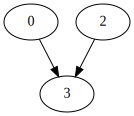

In [18]:
print(keys[0])
agraphs[keys[0]]

X2=0


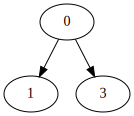

In [19]:
print(keys[1])
agraphs[keys[1]]

X0=0


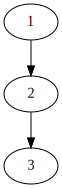

In [20]:
print(keys[2])
agraphs[keys[2]]

### Sampling data

In [21]:
df = tree.sample(10)
df

Creating tree on the fly while sampling to save space when allowing for singleton stages.


,0,1,2,3
0,2,2,2,2
1,0,0,0,1
2,0,0,0,0
3,0,0,1,1
4,0,0,1,1
5,0,0,1,1
6,0,0,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,0


### Write the CStree structure to a Pandas dataframe

In [22]:
treedf = tree.to_df(write_probs=True)
treedf

,0,1,2,3,PROB_0,PROB_1
0,2,2,2,2,NaN,NaN
1,0,-,-,-,0.956144,0.043856
2,1,-,-,-,0.582621,0.417379
3,*,0,-,-,0.576286,0.423714
4,0,1,-,-,0.191666,0.808334
5,1,1,-,-,0.534362,0.465638
6,0,*,0,-,0.563052,0.436948
7,0,*,1,-,0.167056,0.832944
8,1,*,0,-,0.117001,0.882999
9,1,1,1,-,0.738383,0.261617


### Read CStree from a Pandas dataframe

In [23]:
t = ct.df_to_cstree(treedf)
t.to_df(write_probs=True)

,0,1,2,3,PROB_0,PROB_1
0,2,2,2,2,NaN,NaN
1,0,-,-,-,0.956144,0.043856
2,1,-,-,-,0.582621,0.417379
3,*,0,-,-,0.576286,0.423714
4,0,1,-,-,0.191666,0.808334
5,1,1,-,-,0.534362,0.465638
6,0,*,0,-,0.563052,0.436948
7,0,*,1,-,0.167056,0.832944
8,1,*,0,-,0.117001,0.882999
9,1,1,1,-,0.738383,0.261617


Use plot(full=True) to draw the full tree.


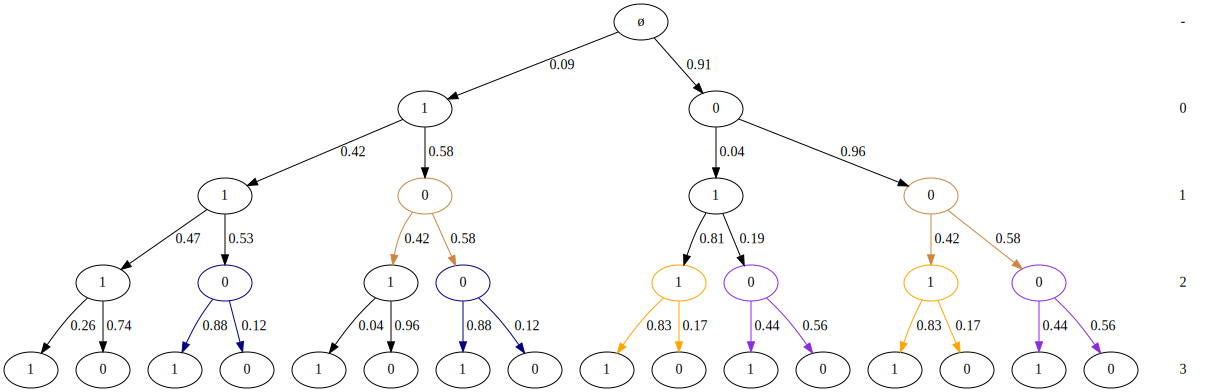

In [24]:
t.plot()